### R2 coefficient

In this unit, we will learn about the coefficient of determination R2 which is a common evaluation metric for linear regressions. It’s also the default metric returned by many Scikit-learn objects such as SGDRegressor or HuberRegressor.

Unlike cost functions, the coefficient R2 doesn’t directly express the error made by our model. In fact, we can interpret it as a comparison between our model and the constant mean baseline.

Let’s take an example. Say that we are working on the marketing campaign dataset.

In [1]:
import pandas as pd

# Load data
data_df = pd.read_csv("c3_marketing-campaign.csv")
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

Our goal is to fit and evaluate a linear regression model. To achieve this, we define the RSS() function and start by evaluating the constant mean baseline.

In [2]:
import numpy as np

# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))


# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print("RSS baseline:", rss_baseline)


RSS baseline: 100.86060792


Now that we have a baseline, we can fit other models and compare them against this baseline score. For instance, let’s fit a linear regression using the code from the previous unit.



In [3]:
from scipy.linalg import lstsq

# Fit a multiple linear regression
X1 = np.c_[np.ones(X.shape[0]), X]
w, model_rss, _, _ = lstsq(X1, y)
print("RSS:", model_rss)  # ~1.685

RSS: 1.685450868082472


As we can see, there is a significant difference in the RSS scores between our baseline and the linear regression. To quantify this difference, we can compute the R2 coefficient which is one minus the ratio between the two scores.

R2=1-(RSSmodel/RRSbaseline)

It’s interesting to note that the ratio is always greater than or equal to zero since RSS scores cannot be negative. Hence, the R2 coefficient is smaller than or equal to one. We can distinguish four cases.

* If R2=1, then the ratio is zero which means that the RSS of the model is zero and that it makes no error
* If R2 is close to 1, then the model performs way better than the baseline
* If R2 is close to 0, then the model and the baseline have a similar performance
* If R2<0, then it performs worse than the baseline

Let’s compute the R2 coefficient of our linear regression model.



In [5]:
# R^2 coefficient
R2 = 1 - (model_rss / rss_baseline)
print("R^2 coefficient:", R2)  # Prints: ~0.983

R^2 coefficient: 0.9832893048848236


We get a score above 98%. Let’s compare it to the R2 coefficient of the simple linear regression model from the previous subject. Using the television budgets, we obtained an RSS score around 15.74.

In [6]:
# R^2 of simple linear regression model
R2 = 1 - (15.74 / rss_baseline)
print("R^2 coefficient:", R2) # Prints: ~0.844

R^2 coefficient: 0.8439430385697798


This time, the R2 coefficient is around 84%.

#### Proportion of variance explained
The coefficient of determination R2 is the proportion of the variance in the target variable y that is predictable from the input variable(s) x.


In other words, it’s a measure of how well we can explain, with our model, how the target variable y varies using the input variable(s) x. The idea is that the target values vary around their mean value and we can quantify this variation by summing the squares of the differences between each target value yi and the mean target value y.

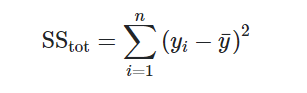

In [7]:
from IPython.display import Image
Image(filename="SS.png")

The second y may correspond to the mean, when using the RSS score of the mean baseline. After fitting the model, we may use y as the prediction, hence SS is now the quantification of the variation summing the squares of the residuals.

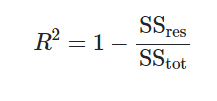

In [8]:
from IPython.display import Image
Image(filename="R2.png")

Summary

* Intuitively, it measures how well a model performs compared to the constant mean baseline
* It is always smaller than or equal to one. Ideally, it should be close to one
* The coefficient is defined as the proportion of variance explained by the model